In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## 전처리

In [2]:
tem = pd.read_csv('./data1/행정구역_시군구_별_인구수.csv')

tem['행정구역(시군구)별'].unique()
temp = tem.loc[2:]
temp.index = temp['행정구역(시군구)별']
temp = temp.drop('행정구역(시군구)별', axis=1)
peo = temp.iloc[:,:24]

tem = pd.read_csv('./data1/자동차등록대수현황_시도별.csv', encoding='cp949')
tem.index=tem['시도(1)']
car = tem.iloc[:,3:]
car = car.drop('시도(1)')
car = car.astype(int)
car.columns = pd.to_datetime(car.columns)

peo = peo.astype(int)
car.sort_values(by='시도(1)')

peo.index = ['서울', '부산', '대구', '인천', '광주', '대전', '울산',
       '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남',
       '제주']

peo.columns = pd.to_datetime(peo.columns)

# 시각화

## 인구자료

<ipython-input-37-677c544d5bd7>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  de = peo.T['2020'].mean() - peo.T['2019'].mean()


<AxesSubplot:>

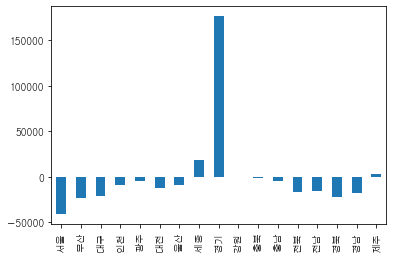

In [37]:
# 2019년 대비 2020년의 인구의 단순 증가 수치 파악
de = peo.T['2020'].mean() - peo.T['2019'].mean()
de.plot(kind='bar')

In [15]:
de

서울    -40945.833333
부산    -22997.916667
대구    -21345.250000
인천     -9151.583333
광주     -4598.416667
대전    -12343.250000
울산     -9523.250000
세종     18264.000000
경기    176682.833333
강원      -649.000000
충북     -1021.500000
충남     -4895.833333
전북    -16850.166667
전남    -15245.583333
경북    -21916.666667
경남    -17741.250000
제주      2481.333333
dtype: float64

<ipython-input-38-e18bf5f3e479>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  de1 = (peo.T['2020-12'].mean() - peo.T['2019-12'].mean())


<AxesSubplot:>

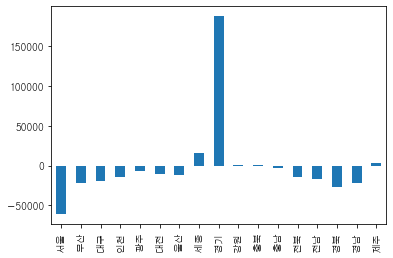

In [38]:
de1 = (peo.T['2020-12'].mean() - peo.T['2019-12'].mean())
de1.plot(kind='bar')

## 결합 ( 인구 대비 자동차 수 )

In [23]:
# 단순 차량 등록대수의 증가
(car.T.pct_change(periods=12)['2020':].mean() * 100).sort_values(ascending=False)

시도(1)
세종    8.609704
경기    4.193416
충북    3.911590
강원    3.362278
전남    3.218197
충남    3.210033
광주    2.875189
인천    2.682253
전북    2.481463
경남    2.397484
대구    2.366818
경북    2.317695
제주    2.295040
대전    2.076134
울산    2.010861
부산    1.851521
서울    1.139799
dtype: float64

In [110]:
# 인구 100명 중 몇 명이 자동차를 가지고 있음
car_per_people = car/peo * 100
car_per_people.iloc[:,-1].sort_values(ascending=False)

제주    43.459500
세종    42.822857
울산    42.085462
대구    41.354918
충북    41.009672
경북    41.009282
충남    40.722640
경남    40.473401
강원    39.135426
전북    39.060220
광주    38.689104
대전    38.406101
인천    37.891919
전남    37.179302
경기    36.403589
부산    32.522039
서울    26.705387
Name: 2020-12-01 00:00:00, dtype: float64

In [25]:
# 전년 대비 증가율의 평균
(car_per_people.T.pct_change(periods=12)['2020':].mean() * 100).sort_values(ascending=False)

전남    4.066521
충북    3.977979
충남    3.448245
전북    3.435638
강원    3.405582
대구    3.265889
광주    3.200711
경북    3.165662
인천    3.001675
경남    2.940372
대전    2.932579
세종    2.875939
울산    2.862400
경기    2.813784
부산    2.539536
제주    1.917268
서울    1.566697
dtype: float64

In [36]:
car_per_people.T.index = pd.to_datetime(car_per_people.T.index)

cpp = car_per_people.T
cpp.index = pd.to_datetime(cpp.index)
covid = pd.concat([cpp['2019'].mean(), cpp['2020'].mean()], axis=1)
covid.columns = ['2019년','2020년']
covid

<ipython-input-36-08029872a374>:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  covid = pd.concat([cpp['2019'].mean(), cpp['2020'].mean()], axis=1)


,2019년,2020년
강원,37.223632,38.492465
경기,34.811206,35.791733
경남,38.721384,39.860810
경북,39.133448,40.373208
광주,36.916112,38.098460
대구,39.221752,40.504538
대전,36.790653,37.870290
부산,31.230131,32.023847
서울,25.971266,26.378466
세종,41.041773,42.222602


<AxesSubplot:>

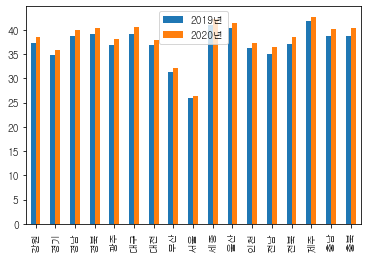

In [31]:
covid.plot(kind='bar')

In [61]:
# 전년대비 자동차등록대수 증가율
((covid['2020년']-covid['2019년'])/covid['2019년']) * 100

강원    3.408679
경기    2.816701
경남    2.942625
경북    3.168031
광주    3.202795
대구    3.270599
대전    2.934544
부산    2.541508
서울    1.567888
세종    2.877138
울산    2.864490
인천    3.003707
전남    4.069871
전북    3.438045
제주    1.915707
충남    3.450618
충북    3.980647
dtype: float64

In [121]:
CovidChangeCar = (car_per_people.T.pct_change(periods=12)['2020':].mean() * 100)

In [122]:
CovidChangeCar 

강원    3.405582
경기    2.813784
경남    2.940372
경북    3.165662
광주    3.200711
대구    3.265889
대전    2.932579
부산    2.539536
서울    1.566697
세종    2.875939
울산    2.862400
인천    3.001675
전남    4.066521
전북    3.435638
제주    1.917268
충남    3.448245
충북    3.977979
dtype: float64

# 대중교통 이용인원 데이터

In [137]:
t = pd.read_csv('./data1/한국교통안전공단_대중교통 이용인원 현황.csv', encoding='cp949')
t.set_index(['구분1'], drop=True, inplace=True)

In [156]:
Transport = (t.iloc[:,0]*5 + t.iloc[:,1]+t.iloc[:,2]) /7

In [157]:
TransUser = Transport / peo.T.loc['2019'].mean() * 100

In [159]:
Transuser = pd.DataFrame(TransUser, columns=['대중교통'])
Transuser

,대중교통
구분1,
서울,41.276087
부산,27.690449
대구,18.482222
인천,25.346985
광주,13.373001
대전,15.901543
울산,10.995708
세종,6.402461
경기,21.653449


<AxesSubplot:xlabel='구분1'>

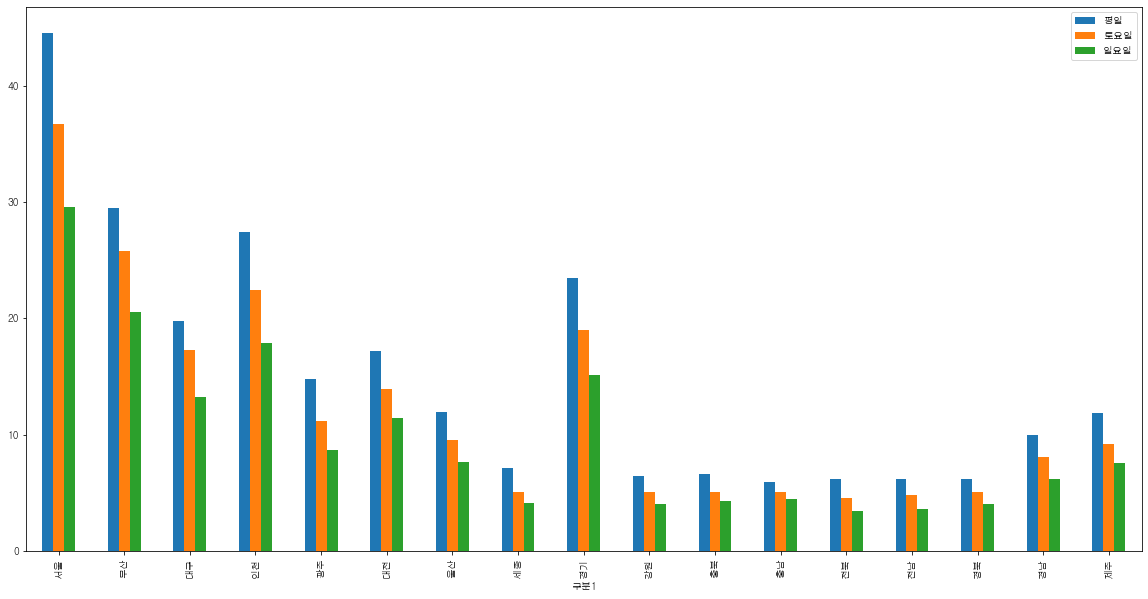

In [160]:
# TransportUser = t.copy()
# for c in TransportUser.columns.tolist():
#     TransportUser[c] = t[c]/ peo.T.loc['2019'].mean() * 100

# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (20,10)

# TransportUser.plot(kind='bar')

In [129]:
CovidChangeCar

강원    3.405582
경기    2.813784
경남    2.940372
경북    3.165662
광주    3.200711
대구    3.265889
대전    2.932579
부산    2.539536
서울    1.566697
세종    2.875939
울산    2.862400
인천    3.001675
전남    4.066521
전북    3.435638
제주    1.917268
충남    3.448245
충북    3.977979
dtype: float64

In [131]:
CovidChangeCar = pd.DataFrame(CovidChangeCar, columns=['자동차증가'])

In [132]:
CovidChangeCar.index

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object')

In [161]:
CovidTransportChange = pd.merge(CovidChangeCar, Transuser, right_index=True, left_index=True)

In [164]:
CovidTransport = covid.merge(CovidTransportChange, right_index=True, left_index=True)

In [165]:
CovidTransport

,2019년,2020년,자동차증가,대중교통
강원,37.223632,38.492465,3.405582,5.917339
경기,34.811206,35.791733,2.813784,21.653449
경남,38.721384,39.860810,2.940372,9.174343
경북,39.133448,40.373208,3.165662,5.702033
광주,36.916112,38.098460,3.200711,13.373001
대구,39.221752,40.504538,3.265889,18.482222
대전,36.790653,37.870290,2.932579,15.901543
부산,31.230131,32.023847,2.539536,27.690449
서울,25.971266,26.378466,1.566697,41.276087
세종,41.041773,42.222602,2.875939,6.402461


<AxesSubplot:>

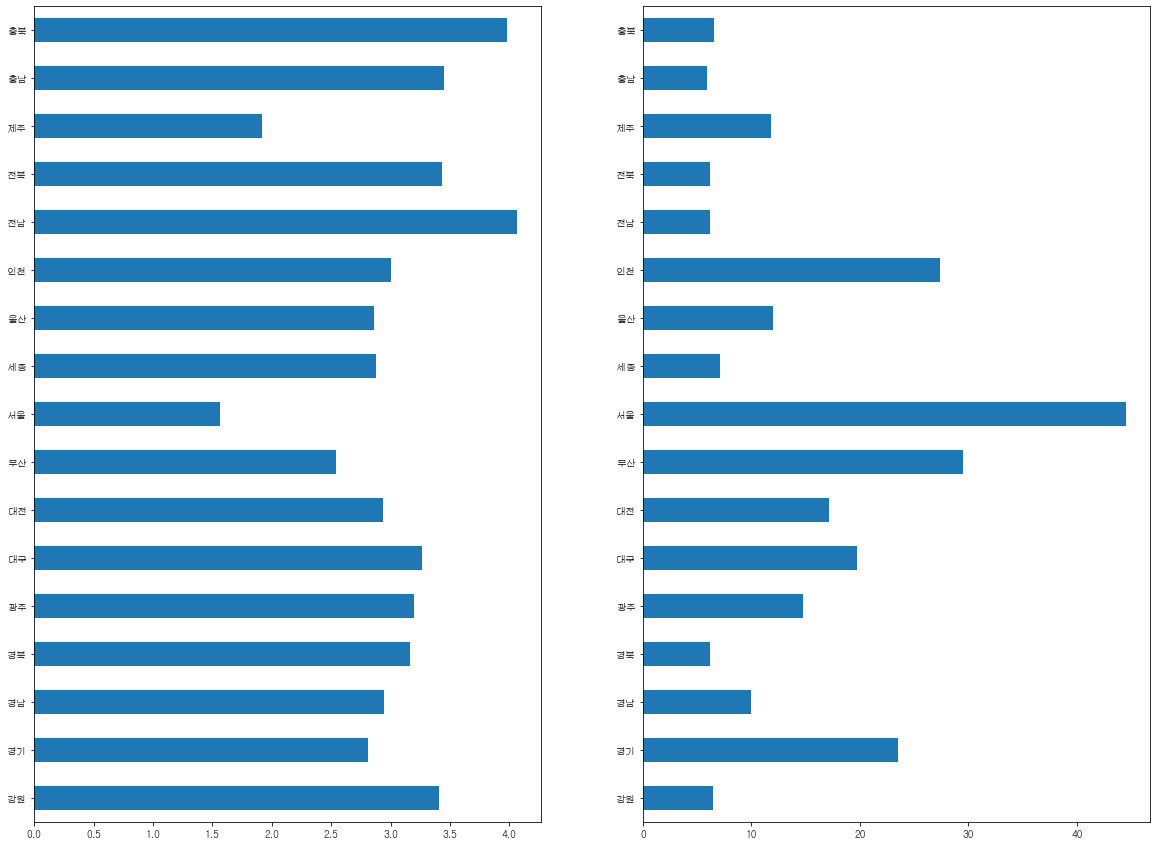

In [92]:
plt.rcParams["figure.figsize"] = (20,15)

plt.subplot(1, 2, 1)               
CovidTransportChange.iloc[:,0].plot(kind='barh')

plt.subplot(1, 2, 2)             
CovidTransportChange.iloc[:,1].plot(kind='barh')

In [169]:
Covid_cor = CovidTransport.corr()

<AxesSubplot:>

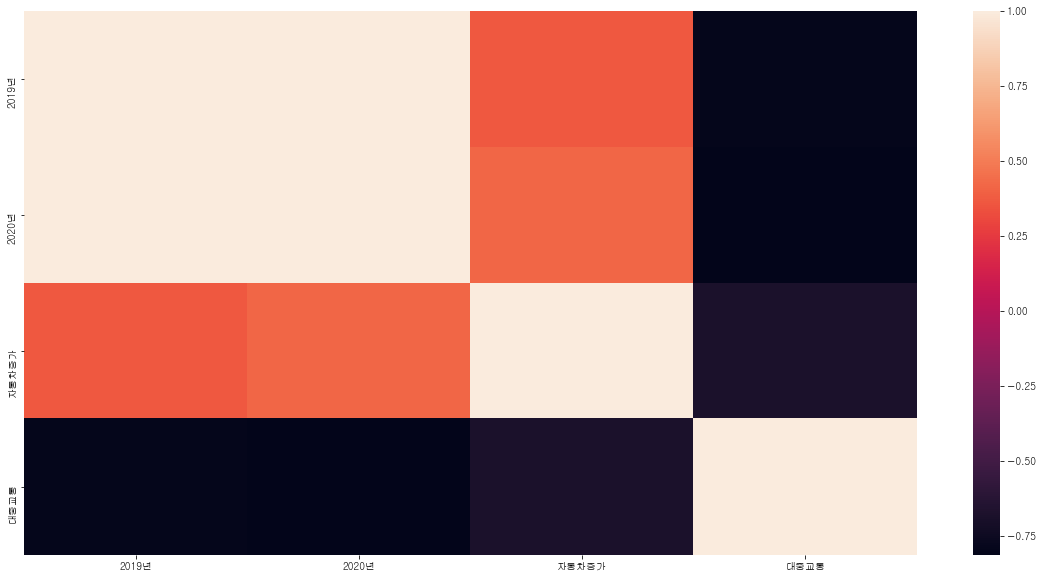

In [171]:
import seaborn as sns
sns.heatmap(Covid_cor)

In [172]:
Covid_cor

,2019년,2020년,자동차증가,대중교통
2019년,1.000000,0.998598,0.365852,-0.793315
2020년,0.998598,1.000000,0.414290,-0.814212
자동차증가,0.365852,0.414290,1.000000,-0.681782
대중교통,-0.793315,-0.814212,-0.681782,1.000000


* 대중교통의 이용자 수와 자동차 등록대수의 증가는 꽤 큰 상관관계가 있음

In [173]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [113]:
CovidTransportChange['자동차등록대수'] = car_per_people.iloc[:,-1].sort_values(ascending=False)

In [114]:
display_side_by_side(CovidTransportChange[['자동차등록대수']].sort_values(by='자동차등록대수', ascending=False), CovidTransportChange[['이용인원']].sort_values(by='이용인원', ascending=False), CovidTransportChange[['평일']].sort_values(by='평일', ascending=True), CovidTransportChange[['토요일']].sort_values(by='토요일', ascending=True), CovidTransportChange[['일요일']].sort_values(by='일요일', ascending=True))

,자동차등록대수
제주,43.459500
세종,42.822857
울산,42.085462
대구,41.354918
충북,41.009672
경북,41.009282
충남,40.722640
경남,40.473401
강원,39.135426
전북,39.060220


## 교통이 불편한 곳
1. 인구대비 자동차 등록대수가 많은 곳 
2. 인구대비 대중교통 이용자가 적은 곳

# 코로나 이후의 변화를 기준으로 문화 관광 사업 대책 마련의 시급한 지역을 선정하였다.

<img src = 'RENTCAR.jfif'>

# 배경
* 최근 여행 트렌드 키워드 : 근거리, 언택트, 안전 여행
* 분석 목적: 키워드에 적합한 여행지를 선정해보자
* 뉴노멀 시대 적합한 여행지 선정 ( 디테일 하게 )

1) 언택트
데이터: (교통이 불편한 곳 + 매출이 적은 곳 + 문화시설 수가 많은 곳) 
코로나 이후 트렌드에 적합한 여행 추천 => 온라인 컨텐츠 지역, 교통인프라 구축
(교통이 불편하고 문화시설이 많은 곳 => 비대면 여행지로 선정)

2) 근거리, 생활관광
데이터: (취급액 증가율이 높은 곳들(코로나 안전지역) + '자연' 문화시설이 많은 곳 20개를 지역)
생활관광지역으로 선정. 

0. 문화 관광 사업 대책 마련이 시급한 곳 정의

  * 매출 관련
    - 코로나 이후의 매출 감소가 큰 지역
    - 코로나 이전의 매출은 증가했던 지역
    
  * 문화시설 관련
    - 관광할 만한 문화요소는 많이 존재
    - 현재 트렌드에 맞는 문화요소가 존재 (자연관광, 코로나 안전지역)

1. 지역 선정 기준 마련

 1) 관광
 
  * 비대면 여행지
    - 교통 불편(접근성 좋지않음)
    - 코로나 이후의 매출 감소가 매우 큼
    - 관광할 만한 문화요소가 존재함  

  * 근거리, 생활관광 여행지
    - 코로나 이후의 트렌드와 맞는 부문의 매출의 증가율이 높은 곳(코로나 안전지역)
    - 자연 문화 시설이 많은 지역  

1. 교통이 불편하지만 관광할 만한 문화요소가 존재함

* 교통
- 인구대비 자동차 등록대수가 많은 곳 (차량이 없으면 이동하기가 불편한 지역이므로)
- 인구대비 대중교통 이용자가 적은 곳

- 카드 데이터 내 교통 매출의 변화가 큰 곳

- 자전거 매출이 높은 곳(참고사항) -> 근거리, 생활관광 여행지

* 문화시설
- 비대면 관광지 : 인문
- 언택트 관광지
     -> 자연, 레저(카드 데이터 상에서도 체험에 대한 감소폭은 적음), 자전거

-------------------------------------------------------------------
* 렌터카 지역별 등록대수 (높으면 안전 여행지, 낮으면 비대면)
제주, 인천이 압도적으로 높음
경남, 전남, 서울, 부산 경기 순

2. 정책 제안

  * 비대면 여행지
    - 교통 불편(접근성 좋지않음)
    - 코로나 이후의 매출 감소가 매우 큼
    - 관광할 만한 문화요소가 존재함  

  * 근거리, 생활관광 여행지
    - 코로나 이후의 트렌드와 맞는 부문의 매출의 증가율이 높은 곳(코로나 안전지역)
    - 자연 문화 시설이 많은 지역